# Recommenders

## 1. Content-Based Filtering

### a. Cosine Similarity with Sugar and Vitamin C

In [1]:
# import data
import pandas as pd

fruit_nutrition = pd.read_csv('../Data/fruit_nutrition.csv')
fruit_nutrition

,fruit_100g,energy_kcal,water_g,protein_g,totalfat_g,fiber_g,sugars_g,vitaminc_mg
0,Banana,89,74.9,1.09,0.33,2.6,12.20,8.7
1,Lemon,29,89.0,1.10,0.30,2.8,2.50,53.0
2,Lime,30,88.3,0.70,0.20,2.8,1.69,29.1
3,Mango,46,88.3,0.91,0.27,1.5,8.39,4.1
4,Peach,60,83.5,0.82,0.38,1.6,13.70,36.4
5,Pineapple,50,86.0,0.54,0.12,1.4,9.85,47.8


In [2]:
# select only numeric columns and update the index
nutrition = fruit_nutrition.set_index('fruit_100g')
nutrition.index.name = None
nutrition

,energy_kcal,water_g,protein_g,totalfat_g,fiber_g,sugars_g,vitaminc_mg
Banana,89,74.9,1.09,0.33,2.6,12.20,8.7
Lemon,29,89.0,1.10,0.30,2.8,2.50,53.0
Lime,30,88.3,0.70,0.20,2.8,1.69,29.1
Mango,46,88.3,0.91,0.27,1.5,8.39,4.1
Peach,60,83.5,0.82,0.38,1.6,13.70,36.4
Pineapple,50,86.0,0.54,0.12,1.4,9.85,47.8


In [3]:
# select just two columns
df = nutrition.iloc[:, 5:]
df.head()

,sugars_g,vitaminc_mg
Banana,12.20,8.7
Lemon,2.50,53.0
Lime,1.69,29.1
Mango,8.39,4.1
Peach,13.70,36.4


In [4]:
# calculate the cosine similarity between two fruits
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(df.loc[['Mango', 'Banana']])[0][1]

0.9864305980007304

In [5]:
# show each row of the array on one line
import numpy as np

# set linewidth to a large value to prevent wrapping
np.set_printoptions(linewidth=np.inf)

In [6]:
# find all cosine similarities
cosine_matrix = cosine_similarity(df)
cosine_matrix

array([[1.        , 0.61832414, 0.62683477, 0.9864306 , 0.83018982, 0.73298243],
       [0.61832414, 1.        , 0.99994086, 0.48090193, 0.95146351, 0.98784307],
       [0.62683477, 0.99994086, 1.        , 0.49040872, 0.95475426, 0.98947527],
       [0.9864306 , 0.48090193, 0.49040872, 1.        , 0.72739811, 0.61135407],
       [0.83018982, 0.95146351, 0.95475426, 0.72739811, 1.        , 0.98773952],
       [0.73298243, 0.98784307, 0.98947527, 0.61135407, 0.98773952, 1.        ]])

In [7]:
# turn the array into a dataframe
cosine_df = pd.DataFrame(cosine_matrix, index=df.index, columns=df.index)
cosine_df

,Banana,Lemon,Lime,Mango,Peach,Pineapple
Banana,1.000000,0.618324,0.626835,0.986431,0.830190,0.732982
Lemon,0.618324,1.000000,0.999941,0.480902,0.951464,0.987843
Lime,0.626835,0.999941,1.000000,0.490409,0.954754,0.989475
Mango,0.986431,0.480902,0.490409,1.000000,0.727398,0.611354
Peach,0.830190,0.951464,0.954754,0.727398,1.000000,0.987740
Pineapple,0.732982,0.987843,0.989475,0.611354,0.987740,1.000000


### b. Cosine Similarity with All Nutritional Values

In [8]:
# view original data
nutrition

,energy_kcal,water_g,protein_g,totalfat_g,fiber_g,sugars_g,vitaminc_mg
Banana,89,74.9,1.09,0.33,2.6,12.20,8.7
Lemon,29,89.0,1.10,0.30,2.8,2.50,53.0
Lime,30,88.3,0.70,0.20,2.8,1.69,29.1
Mango,46,88.3,0.91,0.27,1.5,8.39,4.1
Peach,60,83.5,0.82,0.38,1.6,13.70,36.4
Pineapple,50,86.0,0.54,0.12,1.4,9.85,47.8


In [9]:
# look at all 6 columns
cosine_matrix_all = cosine_similarity(nutrition)
cosine_matrix_all

array([[1.        , 0.77186848, 0.83412488, 0.92474189, 0.93676783, 0.87931265],
       [0.77186848, 1.        , 0.97739451, 0.87650678, 0.94133956, 0.9780653 ],
       [0.83412488, 0.97739451, 1.        , 0.95282112, 0.95471941, 0.96986632],
       [0.92474189, 0.87650678, 0.95282112, 1.        , 0.94580335, 0.91804609],
       [0.93676783, 0.94133956, 0.95471941, 0.94580335, 1.        , 0.98972148],
       [0.87931265, 0.9780653 , 0.96986632, 0.91804609, 0.98972148, 1.        ]])

In [10]:
# turn it into a dataframe
cosine_all_df = pd.DataFrame(cosine_matrix_all, index=nutrition.index, columns=nutrition.index)
cosine_all_df

,Banana,Lemon,Lime,Mango,Peach,Pineapple
Banana,1.000000,0.771868,0.834125,0.924742,0.936768,0.879313
Lemon,0.771868,1.000000,0.977395,0.876507,0.941340,0.978065
Lime,0.834125,0.977395,1.000000,0.952821,0.954719,0.969866
Mango,0.924742,0.876507,0.952821,1.000000,0.945803,0.918046
Peach,0.936768,0.941340,0.954719,0.945803,1.000000,0.989721
Pineapple,0.879313,0.978065,0.969866,0.918046,0.989721,1.000000


### c. Make a Content-Based Filtering Recommendation

In [11]:
# if i like mangos, what other fruits might i like? -- using sugar and vitamin c only
cosine_df[['Mango']].sort_values(by='Mango', ascending=False)

,Mango
Mango,1.000000
Banana,0.986431
Peach,0.727398
Pineapple,0.611354
Lime,0.490409
Lemon,0.480902


In [12]:
# if i like mangos, what other fruits might i like? -- using all nutritional values
cosine_all_df[['Mango']].sort_values(by='Mango', ascending=False)

,Mango
Mango,1.000000
Lime,0.952821
Peach,0.945803
Banana,0.924742
Pineapple,0.918046
Lemon,0.876507


### d. Function to Make Fruit Recommendations

In [13]:
# write a function to make fruit recommendations
def recommend_fruits_based_on_liking(fruit_name, similarity_df):
        
    # check if the input fruit is in the DataFrame
    if fruit_name not in df.index:
        return f"{fruit_name} is not found in the fruit list."
    
    # sort the specified column in descending order
    sorted_column = similarity_df[[fruit_name]].sort_values(by=fruit_name, ascending=False)
    
    # display the result
    return sorted_column

In [14]:
# example usage with mangos + sugar and vitamin c
recommend_fruits_based_on_liking('Mango', cosine_df)

,Mango
Mango,1.000000
Banana,0.986431
Peach,0.727398
Pineapple,0.611354
Lime,0.490409
Lemon,0.480902


In [15]:
# example usage with mangos + all nutritional values
recommend_fruits_based_on_liking('Mango', cosine_all_df)

,Mango
Mango,1.000000
Lime,0.952821
Peach,0.945803
Banana,0.924742
Pineapple,0.918046
Lemon,0.876507


In [16]:
# error example
recommend_fruits_based_on_liking('Kiwi', cosine_all_df)

'Kiwi is not found in the fruit list.'

## 2. Collaborative Filtering

### a. Data Prep: User-Item Matrix

In [17]:
# read in the ratings data
fruit_ratings = pd.read_csv('../Data/fruit_ratings.csv')
fruit_ratings.head()

,User,Fruit,Rating
0,user0,Lemon,4.3
1,user1,Lemon,4.6
2,user2,Lemon,4.2
3,user3,Lemon,4.4
4,user4,Lemon,4.1


In [18]:
# restructure the data into a user-item matrix
X = (fruit_ratings.pivot(index='User', columns='Fruit', values='Rating'))
X.head()

Fruit,Banana,Lemon,Lime,Mango,Peach,Pineapple
User,,,,,,
user0,1.1,4.3,4.7,1.0,2.4,4.9
user1,1.2,4.6,4.5,1.3,2.1,4.8
user10,4.8,3.7,4.1,2.2,3.3,2.4
user11,2.5,2.9,3.7,4.1,1.8,4.1
user12,4.2,4.1,2.3,3.2,5.0,1.7


In [19]:
# identify nan values
X[X.isna().any(axis=1)]

Fruit,Banana,Lemon,Lime,Mango,Peach,Pineapple
User,,,,,,
user19,3.5,4.8,NaN,3.1,3.4,3.2


In [20]:
# ratings range
fruit_ratings.describe()

,Rating
count,179.000000
mean,3.147486
std,1.465610
min,1.000000
25%,1.650000
50%,3.400000
75%,4.600000
max,5.000000


In [21]:
# mean of lime ratings
X.Lime.describe()

count    29.000000
mean      2.937931
std       1.636724
min       1.000000
25%       1.200000
50%       3.100000
75%       4.600000
max       4.900000
Name: Lime, dtype: float64

In [22]:
# updated user-item matrix with nan values as numeric values
X = (fruit_ratings.pivot(index='User', columns='Fruit', values='Rating').fillna(3))
X.head()

Fruit,Banana,Lemon,Lime,Mango,Peach,Pineapple
User,,,,,,
user0,1.1,4.3,4.7,1.0,2.4,4.9
user1,1.2,4.6,4.5,1.3,2.1,4.8
user10,4.8,3.7,4.1,2.2,3.3,2.4
user11,2.5,2.9,3.7,4.1,1.8,4.1
user12,4.2,4.1,2.3,3.2,5.0,1.7


### b. Modeling: TruncatedSVD

In [23]:
# import truncated svd from sklearn
from sklearn.decomposition import TruncatedSVD

In [24]:
# apply SVD to the ratings
svd = TruncatedSVD(n_components=2)
svd.fit(X)

TruncatedSVD()

In [25]:
# view the U matrix
U = svd.transform(X)

# alternative
U = svd.fit_transform(X)

U_df = pd.DataFrame(U, index=X.index)
U_df.head()

,0,1
User,,
user0,7.473496,4.062791
user1,7.491190,3.972463
user10,8.330967,0.158395
user11,7.725274,0.926172
user12,8.366775,-1.396251


In [26]:
# view the shape of the U matrix (users x latent features)
U_df.shape

(30, 2)

In [27]:
# view the sigma matrix
sigma = svd.singular_values_
sigma

array([42.3738503, 17.6542247])

In [28]:
# view the VT matrix
VT = svd.components_

VT_df = pd.DataFrame(VT, columns=X.columns)
VT_df

Fruit,Banana,Lemon,Lime,Mango,Peach,Pineapple
0,0.422823,0.376398,0.378344,0.381959,0.44026,0.443486
1,-0.468373,0.419367,0.467655,-0.426644,-0.28962,0.346628


In [29]:
# view the shape of the VT matrix
VT_df.shape

(2, 6)

### c. Tuning: Choosing the Number of Components

In [30]:
# view the original data set
X.head()

Fruit,Banana,Lemon,Lime,Mango,Peach,Pineapple
User,,,,,,
user0,1.1,4.3,4.7,1.0,2.4,4.9
user1,1.2,4.6,4.5,1.3,2.1,4.8
user10,4.8,3.7,4.1,2.2,3.3,2.4
user11,2.5,2.9,3.7,4.1,1.8,4.1
user12,4.2,4.1,2.3,3.2,5.0,1.7


In [31]:
# view the shape of the original data set
X.shape

(30, 6)

#### Model 1: SVD with 2 Components

In [32]:
# view the U matrix
U_df.head()

,0,1
User,,
user0,7.473496,4.062791
user1,7.491190,3.972463
user10,8.330967,0.158395
user11,7.725274,0.926172
user12,8.366775,-1.396251


In [33]:
# view the shape of the U matrix
U_df.shape

(30, 2)

In [34]:
# view the explained variance ratios
svd.explained_variance_ratio_

array([0.01114043, 0.83500665])

In [35]:
# total explained variance
sum(svd.explained_variance_ratio_)

0.8461470788660224

#### Model 2: SVD with All 6 Components

In [36]:
# try SVD with all 6 components
svd6 = TruncatedSVD(n_components=6)
U6 = svd6.fit_transform(X)

In [37]:
# view the U6 matrix
U6_df = pd.DataFrame(U6, index=X.index)
U6_df.head()

,0,1,2,3,4,5
User,,,,,,
user0,7.473496,4.062791,0.069101,-0.252455,-0.363006,0.017474
user1,7.491190,3.972463,0.069951,-0.213452,0.200745,-0.029323
user10,8.330967,0.158395,-1.456494,1.829248,0.024443,0.363001
user11,7.725274,0.926172,1.780361,0.514856,0.997471,-0.492574
user12,8.366775,-1.396251,-2.265663,-0.059205,0.303751,-0.829798


In [38]:
# view the shape of the U matrix
U6_df.shape

(30, 6)

In [39]:
# view the explained variance ratios
svd6.explained_variance_ratio_.round(2)

array([0.01, 0.84, 0.08, 0.05, 0.01, 0.01])

In [40]:
# view the cumulative explained variance ratio
import numpy as np

np.cumsum(svd6.explained_variance_ratio_).round(2)

array([0.01, 0.85, 0.93, 0.98, 0.99, 1.  ])

In [41]:
# prep the data for line plot
cum_evr6 = list(zip(range(1, U6.shape[1] + 1), np.cumsum(svd6.explained_variance_ratio_))) # hits 80% at 2 components
cum_evr6

[(1, 0.011140426986469575),
 (2, 0.846147078866022),
 (3, 0.9263972581039879),
 (4, 0.9759333027137883),
 (5, 0.9903851759902442),
 (6, 0.9999999999999996)]

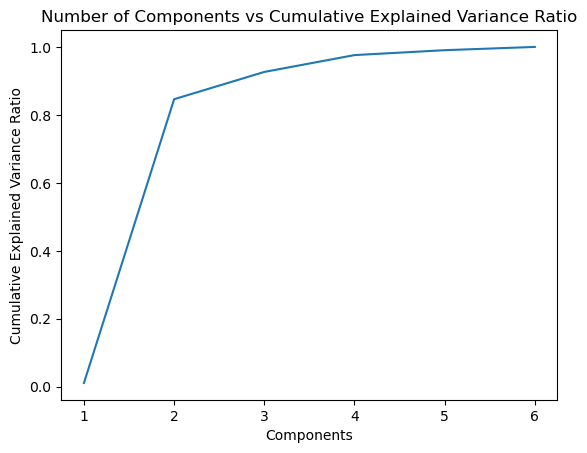

In [42]:
# 80%+ of the variance is captured at 2 components --> choose a 2 component model
cum_evr6_df = pd.DataFrame(cum_evr6).set_index(0)
cum_evr6_df.plot(title='Number of Components vs Cumulative Explained Variance Ratio',
                xlabel='Components',
                ylabel='Cumulative Explained Variance Ratio',
                legend=False);

### d. Recommending: Making Recommendations

#### Step 1: Select a final model

In [43]:
# let's say we settled on the 2 component model
svd = TruncatedSVD(n_components=2)
U = svd.fit_transform(X)

In [44]:
# calculate the total explained variance
sum(svd.explained_variance_ratio_)

0.846147078866022

#### Step 2: Introduce a new user

In [45]:
# this new user has rated 2 out of 6 fruits
new_user = np.array([np.NaN, 2, np.NaN, 5, np.NaN, np.NaN])
new_user

array([nan,  2., nan,  5., nan, nan])

In [46]:
# view the new user's ratings as a dataframe
new_user_6d = pd.DataFrame([new_user], columns=X.columns)
new_user_6d

Fruit,Banana,Lemon,Lime,Mango,Peach,Pineapple
0,NaN,2.0,NaN,5.0,NaN,NaN


In [47]:
# transform the new user into a 2d space using our SVD model
new_user_2d = svd.transform(new_user_6d.fillna(3))
new_user_2d

array([[ 7.71732809, -1.1256194 ]])

#### Step 3: Generate recommendations

In [48]:
# our new user
new_user_2d

array([[ 7.71732809, -1.1256194 ]])

In [49]:
# it's a 1x2 matrix
new_user_2d.shape

(1, 2)

In [50]:
# our VT matrix
svd.components_

array([[ 0.42282328,  0.37639792,  0.37834394,  0.38195861,  0.44026026,  0.44348558],
       [-0.46837309,  0.41936738,  0.46765486, -0.42664448, -0.28962047,  0.34662812]])

In [51]:
# it's a 2x6 matrix
svd.components_.shape

(2, 6)

In [52]:
# we want the output to be a 1x6 matrix to see all of their predicted ratings
new_user_recs = np.dot(new_user_2d, svd.components_)
new_user_recs

array([[3.79027584, 2.43273821, 2.39340291, 3.4279392 , 3.72363531, 3.03235241]])

In [53]:
# it's a 1x6 matrix
new_user_recs.shape

(1, 6)

In [54]:
# view the recommendations
recs = pd.DataFrame(new_user_recs, columns=X.columns)
recs

Fruit,Banana,Lemon,Lime,Mango,Peach,Pineapple
0,3.790276,2.432738,2.393403,3.427939,3.723635,3.032352


In [55]:
# sorted recommendations
top_recs = recs.T.sort_values(0, ascending=False)
top_recs.index.name = None
top_recs.columns = ['Recs']
top_recs

,Recs
Banana,3.790276
Peach,3.723635
Mango,3.427939
Pineapple,3.032352
Lemon,2.432738
Lime,2.393403


In [56]:
# identify the already rated fruits
already_rated = new_user_6d.T.dropna().index
already_rated

Index(['Lemon', 'Mango'], dtype='object', name='Fruit')

In [57]:
# exclude the already rated fruits
top_recs[~top_recs.index.isin(already_rated)]

,Recs
Banana,3.790276
Peach,3.723635
Pineapple,3.032352
Lime,2.393403


## 3. DEMO: Hybrid Recommender

In [58]:
# view the new user
new_user_6d

Fruit,Banana,Lemon,Lime,Mango,Peach,Pineapple
0,NaN,2.0,NaN,5.0,NaN,NaN


In [59]:
# recommender 1: view the collaborative filtering recommendations
top_recs

,Recs
Banana,3.790276
Peach,3.723635
Mango,3.427939
Pineapple,3.032352
Lemon,2.432738
Lime,2.393403


In [60]:
# recommender 2: remember the content-based filtering recommender we created with sugar and vitamin c
recommend_fruits_based_on_liking('Mango', cosine_df)

,Mango
Mango,1.000000
Banana,0.986431
Peach,0.727398
Pineapple,0.611354
Lime,0.490409
Lemon,0.480902


In [61]:
# recommender 3: and the second one with all the nutritional values
recommend_fruits_based_on_liking('Mango', cosine_all_df)

,Mango
Mango,1.000000
Lime,0.952821
Peach,0.945803
Banana,0.924742
Pineapple,0.918046
Lemon,0.876507


In [62]:
# recommender 4: we can also rank fruits by ratings
X.mean().sort_values(ascending=False)

Fruit
Pineapple    3.45
Peach        3.40
Banana       3.24
Lime         2.94
Mango        2.93
Lemon        2.92
dtype: float64

**We can create a hybrid recommender by combining these results**:
* Collaborative filtering recommendations: bananas and peaches
* Content-based filtering recommendations 1: bananas and peaches
* Content-based filtering recommendations 2: limes and peaches
* Top rating recommendations: pineapples and peaches

Our top recommendations can be peaches and bananas, and see how the user interacts with our recommendations.